## KNN and imputing missing values
- https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-13/demo/
- https://github.com/cs109/a-2017/blob/master/Labs/Lab7_Logistic_ROC_Imputation/lab7_Logistics_ROC_Imputation_Solutions.ipynb


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.linear_model as lm
import sklearn as sk
import sklearn.neighbors as neighbors

sns.set()



In [3]:
df_heart = pd.read_csv('./data/Heart.csv')
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [31]:
data_x = df_heart['MaxHR'].values.reshape(-1,1)
data_y = df_heart['AHD'].map(lambda x: 0 if x == 'No' else 1)

Text(0, 0.5, 'Heart Disease')

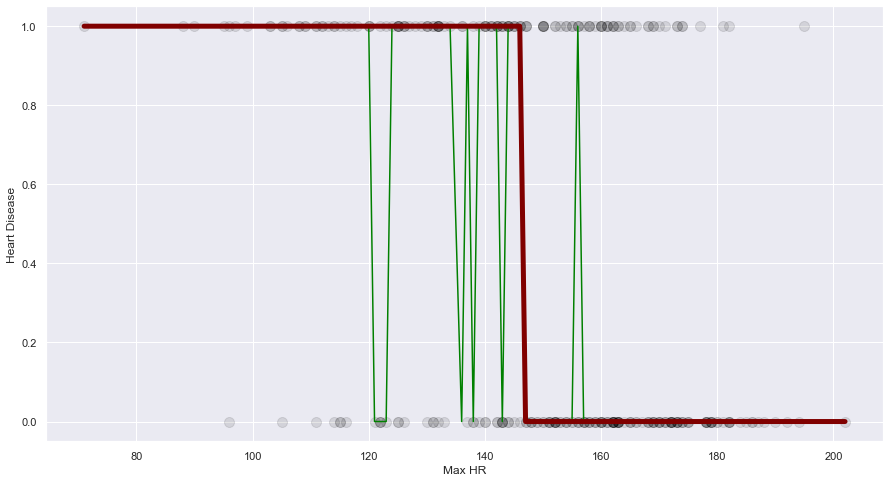

In [85]:
from sklearn import neighbors
import sklearn.metrics as met


knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn20 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn50 = neighbors.KNeighborsClassifier(n_neighbors=50)

# fit knn model
knn1.fit(data_x, data_y)  
knn20.fit(data_x, data_y) 
knn50.fit(data_x, data_y) 

# sort the x values for better line plot and then predict
x = np.sort(data_x, axis = 0)
yhat1 = knn1.predict(x) 
yhat20 = knn10.predict(x) 
yhat50 = knn50.predict(x) 

#met.confusion_matrix(data_y, yhat1)
#knn1.score(data_x, data_y)

plt.figure(figsize=(15,8))
plt.plot(data_x, data_y, 'o', alpha = .1, color = 'black', markersize = 10)
#plt.plot(x, yhat1, '-', alpha = 1, color = 'blue')
plt.plot(x, yhat20, '-', alpha = 1, color = 'green')
plt.plot(x, yhat50, '-', alpha = 1, color = 'maroon', linewidth = 5)
plt.xlabel("Max HR")
plt.ylabel("Heart Disease")



In [87]:
# print accuracy scores

print(knn1.score(data_x, data_y))
print(knn10.score(data_x, data_y))
print(knn50.score(data_x, data_y))


0.693069306930693
0.7161716171617162
0.7062706270627063


### Lab 7 - imputing missing values

In [111]:
gssdata = pd.read_csv('./data/gssdata4.csv')
print("Shape", gssdata.shape)
gssdata.head()


Shape (1551, 9)


,health,age,sex,educ,sexornt,partyid,race,married,income
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN


In [95]:
np.sum(gssdata['income'].isnull())

588

In [106]:
# create separate columns
# More complicated way to covnert factors into separate columns
gssdata['poorhealth'] = np.where(gssdata['health'] == 'poor', 1,0)
gssdata['goodhealth'] = np.where(gssdata['health'] == 'good', 1,0)
gssdata['excellenthealth'] = np.where(gssdata['health'] == 'excellent', 1,0)

# % of ppl with health level
print(np.mean(gssdata['poorhealth'])*100)
print(np.mean(gssdata['goodhealth'])*100)
print(np.mean(gssdata['excellenthealth'])*100)
gssdata.head()

6.382978723404255
47.5177304964539
26.692456479690524


,health,age,sex,educ,sexornt,partyid,race,married,income,poorhealth,goodhealth,excellenthealth
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0,0,0,1
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0,0,0,1
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN,0,1,0
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN,0,0,1
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN,1,0,0


In [116]:
# Convert categorical variables into dummy variables
gssdata = pd.read_csv('./data/gssdata4.csv')
gssdata = pd.get_dummies(gssdata)
gssdata.head()
#gssdata.shape

,age,educ,married,income,health_excellent,health_fair,health_good,health_poor,sex_female,sex_male,sexornt_bisexual,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_dem,partyid_other,partyid_rep,race_black,race_other,race_white
0,53,16,1,18750.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,26,16,1,18750.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,59,13,1,NaN,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
3,74,17,1,NaN,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4,37,10,0,NaN,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


### Method 1 - drop all missing values
Drop all missing values and predict poor health from ```'age','educ','sex_female','partyid_dem','partyid_rep','income'```

In [215]:
# Two ways to drop all rows with missing values
gssdata = gssdata.dropna(axis = 'rows')
#gssdata = gssdata.dropna(how = 'any')
print(gssdata.shape)

gssdata.head()

(963, 20)


,age,educ,married,income,health_excellent,health_fair,health_good,health_poor,sex_female,sex_male,sexornt_bisexual,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_dem,partyid_other,partyid_rep,race_black,race_other,race_white
0,53,16,1,18750.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,26,16,1,18750.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
5,30,15,1,18750.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
9,30,14,1,16250.0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
12,38,15,0,18750.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1


In [126]:
100*np.mean(gssdata[['health_excellent', 'health_fair', 'health_good', 'health_poor']])

health_excellent    30.529595
health_fair         16.303219
health_good         51.505711
health_poor          1.661475
dtype: float64

In [147]:
# Specify the X and Y vectors
X = gssdata[['age','educ','sex_female','partyid_dem','partyid_rep','income']]
Y = gssdata['health_poor']

# split into train and test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=1, train_size = 0.5)

# linear models from sklearn already imported as lm

logit = lm.LogisticRegression()
logit.fit(Xtrain, ytrain)
print("score = ", logit.score(Xtest, ytest))
print("coeffients betas \n", logit.coef_)

score =  0.9813278008298755
coeffients betas 
 [[ 4.57902142e-03 -2.44763640e-01 -4.76004271e-01  1.17425904e+00
   8.35128752e-03 -7.11763712e-05]]


[[473   0]
 [  9   0]]


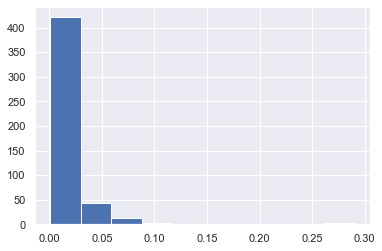

In [217]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix(actual, pred)
# Columns are for predicted (0,1) and rows are observed (0,1)
ypred = logit.predict(Xtest)
print(confusion_matrix(ytest, ypred))

#plot_confusion_matrix(logit, Xtest, ytest)  

# plot probability of predicting 1
yhat = logit.predict_proba(Xtrain);
plt.hist(yhat[:,1]);

In [197]:
# If you change the probability of predicting 1 from default 0.5 to .06, notice how the number of predicted 1s goes up
confusion_matrix(ytest, yhat[:,1] > 0.06)


array([[458,  15],
       [  8,   1]], dtype=int64)

Text(0, 0.5, 'True Positive Rate (TPR)')

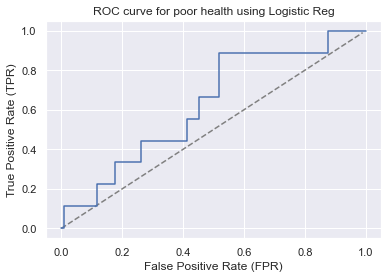

In [244]:
# ROC curve

fpr, tpr, threshold = met.roc_curve(ytest, logit.predict_proba(Xtest)[:,1])

x = np.arange(0,1,0.01)

plt.plot(x , x, '--', color = 'gray')
plt.plot(fpr, tpr)
plt.title("ROC curve for poor health using Logistic Reg")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

### Method 2 - Impute mean

In [224]:
# get the original data and 
# Convert categorical variables into dummy variables
gssdata2 = pd.read_csv('./data/gssdata4.csv')
gssdata2 = pd.get_dummies(gssdata2)
gssdata2.head()

,age,educ,married,income,health_excellent,health_fair,health_good,health_poor,sex_female,sex_male,sexornt_bisexual,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_dem,partyid_other,partyid_rep,race_black,race_other,race_white
0,53,16,1,18750.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,26,16,1,18750.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,59,13,1,NaN,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
3,74,17,1,NaN,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4,37,10,0,NaN,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [229]:
# fill missing income values with mean
gssdata2['income'] = gssdata2.fillna(np.mean(gssdata2['income']))

# check that there are no more null values
sum(gssdata2.income.isnull())


0

In [230]:
# Specify the X and Y vectors
X2 = gssdata2[['income','age','educ','sex_female','partyid_dem','partyid_rep','income']]
Y2 = gssdata2['health_poor']

# split into train and test
from sklearn.model_selection import train_test_split
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X2, Y2, random_state=1, train_size = 0.5)

# linear models from sklearn already imported as lm

logit2 = lm.LogisticRegression()
logit2.fit(Xtrain2, ytrain2)
print("score = ", logit2.score(Xtest2, ytest2))
print("coeffients betas \n", logit2.coef_)

score =  0.9368556701030928
coeffients betas 
 [[ 0.01076633  0.01076633 -0.20084665 -0.36431352  0.05297761 -0.907603
   0.01076633]]


In [239]:
# confusion_matrix(actual, pred)
# Columns are for predicted (0,1) and rows are observed (0,1)
ypred2 = logit2.predict(Xtest2)
yhat2 = logit2.predict_proba(Xtest2) # probabilities

# As you reduce the probability threshold to classify as 1, number of 1s go up
print(confusion_matrix(ytest2, ypred2))
print(confusion_matrix(ytest2, yhat2[:,1] > 0.3))
print(confusion_matrix(ytest2, yhat2[:,1] > 0.1))


[[727   1]
 [ 48   0]]
[[717  11]
 [ 46   2]]
[[597 131]
 [ 29  19]]


Text(0, 0.5, 'True Positive Rate (TPR)')

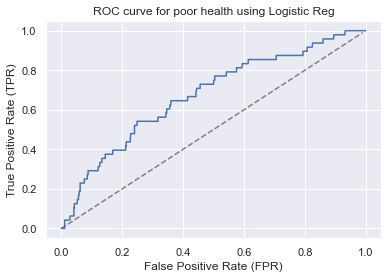

In [243]:
# ROC curve

fpr2, tpr2, threshold2 = met.roc_curve(ytest2, logit2.predict_proba(Xtest2)[:,1])

x = np.arange(0,1,0.01)

plt.plot(x , x, '--', color = 'gray')
plt.plot(fpr2, tpr2)
plt.title("ROC curve for poor health using Logistic Reg")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

### Method 3 - Impute NAs using regression
Build a regression with income = f(other variables) and then predict the missing values of income using this function

In [246]:
# get the original data and 
# Convert categorical variables into dummy variables
gssdata3 = pd.read_csv('./data/gssdata4.csv')
gssdata3 = pd.get_dummies(gssdata2)
gssdata3.head()

,age,educ,married,income,health_excellent,health_fair,health_good,health_poor,sex_female,sex_male,sexornt_bisexual,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_dem,partyid_other,partyid_rep,race_black,race_other,race_white
0,53,16,1,18750.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,26,16,1,18750.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,59,13,1,NaN,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
3,74,17,1,NaN,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
4,37,10,0,NaN,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
